### **Mathematically Optimise Dating**

In [1]:
import numpy as np

population_size = 10000
def try_strategy(rejection_rate):
    # Setting Parameters
    ppl_set = np.arange(0, population_size, 1)
    np.random.shuffle(ppl_set)

    rejected = ppl_set[:int(population_size*rejection_rate)]
    best_rejected = max(rejected)
    unvisited = ppl_set[int(population_size*rejection_rate):]

    # Simulating
    for num in unvisited:
        if num > best_rejected:
            return num
    
    return unvisited[-1]

def get_success_rate(rejection_rate = .367, num_trials = 1000):
    successes = 0
    for i in range(num_trials):
        if try_strategy(rejection_rate) == population_size - 1:
            successes += 1
    return successes / num_trials

In [2]:
rejection_to_success = {}
precision_num = 100
for i in range(1, precision_num):
    rejection_to_success[i/precision_num * 100] = get_success_rate(i/precision_num)

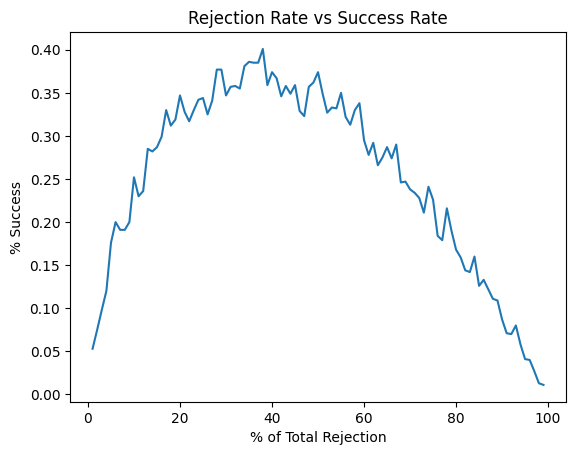

In [4]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(list(rejection_to_success.keys()), list(rejection_to_success.values()))
plt.xlabel("% of Total Rejection")
plt.ylabel("% Success")
plt.title("Rejection Rate vs Success Rate")
plt.savefig("generated_graph.png")
plt.show()